# MSDS-432: Module 4 - Implement a Quicksort Algorithm  
Jason Adam  

## Imports

In [41]:
import functools
import random
import string
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [27]:
class TimeFunc:
    """Decorator to return run time of function in seconds."""
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.func_time = 0
        
    def __call__(self, *args, **kwargs):
        start_time = time.perf_counter()
        result = self.func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        self.func_time = run_time
        return result

## 1. Create 5 Random Lists  
Set up five lists of randomly generated strings of length 50 characters, each with a length of 200, 400, 600, 800, 1000.  You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.  

**I constructed the lists inside the function in section 4.**

## 2. Implement Quicksort Algorithm  
Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list.

In [34]:
# Define Quicksort
@TimeFunc
def quick_sort(l: list) -> list:
    """Quicksort algorithm.
    
    Parameters
    ----------
    l: list
        List of values to be sorted
        
    Returns
    -------
    list:
        Sorted list
    """
    if len(l) < 2:
        return l
    else:
        pivot = l[0]
        less: list = [i for i in l[1:] if i <= pivot]
        greater: list = [i for i in l[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

## 3. Compare Additional Sorting Algorithms  
Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc). Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use `np.sort()` or `sorted()`, etc. You must code the algorithm in order to compare the complexity of each. Capture the computation time for each list using each sorting algorithm that you have used.

In [35]:
# Bubble Sort
@TimeFunc
def bubble_sort(l: list) -> None:
    """Bubblesort algorithm.
    
    Sorts in place.
    
    Parameters
    ----------
    l: list
        List of values to be sorted
    """
    n: int = len(l)
    for i in range(n):
        for j in range(0, n - i - 1):
            if l[j] > l[j + 1]:
                l[j], l[j + 1] = l[j + 1], l[j]


# Merge Sort
@TimeFunc
def merge_sort(arr: list) -> None:
    """Merge Sort Algorithm.
    
    Sorts in place.
    
    Parameters
    ----------
    arr: list
        List of items to be sorted.
    """
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        L = arr[:mid]  # Dividing the array elements
        R = arr[mid:]  # into 2 halves
        mergeSort(L)  # Sorting the first half
        mergeSort(R)  # Sorting the second half
        i = j = k = 0
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


# Insertion Sort
@TimeFunc
def insertion_sort(arr: list) -> None:
    """Insertion Sort Algorithm.
    
    Sorts in place.
    
    Parameters
    ----------
    arr: list
        List of items to be sorted.
    """
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
        key = arr[i]
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

## 4. Compare Sort Times  
Create a table containing each algorithm and the timings for each list. Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves). Discuss your findings with explanations for what you observe.

In [38]:
def create_compare_df() -> pd.DataFrame:
    """Generate comparison dataframe for lists.
    
    Returns
    -------
    pd.DataFrame
        Pandas data frame containing time metrics for
        selection sort algorithm.
    """
    compare: dict = {
        "array_length": [200, 400, 600, 800, 1000],
        "quicksort_time": [],
        "bubblesort_time": [],
        "mergesort_time": [],
        "insertionsort_time": [],
    }

    # Instantiate list each time through for each algo since they update in place
    for i in compare["array_length"]:
        random.seed(432)
        unsorted_lst = [
            "".join(random.choices(string.ascii_letters, k=50)) for _ in range(i)
        ]
        quick_sort(unsorted_lst)
        compare["quicksort_time"].append(quicksort.func_time)
        random.seed(432)
        unsorted_lst = [
            "".join(random.choices(string.ascii_letters, k=50)) for _ in range(i)
        ]
        bubble_sort(unsorted_lst)
        compare["bubblesort_time"].append(bubble_sort.func_time)
        random.seed(432)
        unsorted_lst = [
            "".join(random.choices(string.ascii_letters, k=50)) for _ in range(i)
        ]
        merge_sort(unsorted_lst)
        compare["mergesort_time"].append(merge_sort.func_time)
        random.seed(432)
        unsorted_lst = [
            "".join(random.choices(string.ascii_letters, k=50)) for _ in range(i)
        ]
        insertion_sort(unsorted_lst)
        compare["insertionsort_time"].append(insertion_sort.func_time)

    df: pd.DataFrame = pd.DataFrame(compare)
    df.quicksort_time = df.quicksort_time.apply(lambda t: t * 1000)
    df.bubblesort_time = df.bubblesort_time.apply(lambda t: t * 1000)
    df.mergesort_time = df.mergesort_time.apply(lambda t: t * 1000)
    df.insertionsort_time = df.insertionsort_time.apply(lambda t: t * 1000)
    return df


cdf = create_compare_df()
cdf

,array_length,quicksort_time,bubblesort_time,mergesort_time,insertionsort_time
0,200,0.593212,5.299955,1.439813,2.059382
1,400,1.140669,15.316665,2.312064,7.202492
2,600,1.709422,27.793392,2.725993,12.823916
3,800,1.797941,49.851985,3.636294,23.336005
4,1000,2.280959,79.505509,4.640925,36.387379


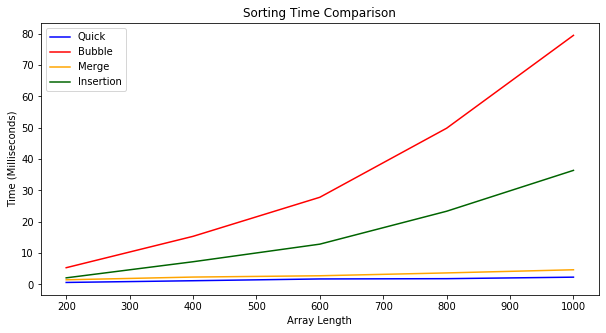

In [43]:
def comparison_plot():
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(cdf.array_length, cdf.quicksort_time, color="blue")
    ax.plot(cdf.array_length, cdf.bubblesort_time, color="red")
    ax.plot(cdf.array_length, cdf.mergesort_time, color="orange")
    ax.plot(cdf.array_length, cdf.insertionsort_time, color="darkgreen")
    ax.set_title("Sorting Time Comparison")
    ax.set_ylabel("Time (Milliseconds)")
    ax.set_xlabel("Array Length")
    ax.legend(["Quick", "Bubble", "Merge", "Insertion"])
    plt.show()
    

comparison_plot()

Bubblesort is significantly slower than our quicksort algorithm. Bubblesort has a $O(n^2)$ complexity which makes it extremely slow as the array size increases. Quicksort exhibits an average run time of $O(n\ log\ n)$  which is scales much better as arrays increase in size. Mergesort also exhibits an $O(n\ log\ n)$ run time, but in reality, quicksort hits it's average run time more often than it's worst case making it edge out merge sort.  

I wanted to zoom in and see if the difference between the two was even noticeable. It doesn't appear to be much different on the size of arrays we're testing against.

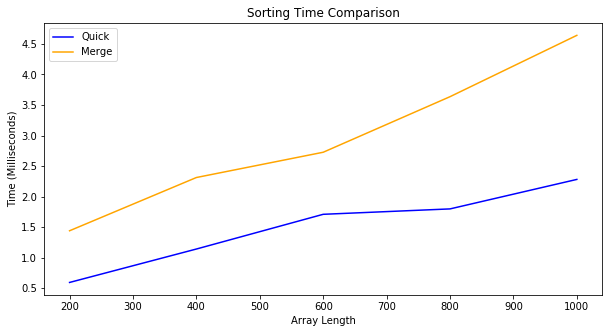

In [44]:
def compare_quick_merge():
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(cdf.array_length, cdf.quicksort_time, color="blue")
    ax.plot(cdf.array_length, cdf.mergesort_time, color="orange")
    ax.set_title("QuickSort vs MergeSort Time Comparison")
    ax.set_ylabel("Time (Milliseconds)")
    ax.set_xlabel("Array Length")
    ax.legend(["Quick", "Merge"])
    plt.show()
    

compare_quick_merge()

## Executive Summary  

Quicksort is one of the fasting sorting algorithms available due to it's divide and conquer strategy. You pick a pivot, move all values less than the pivot to a sub-array to the left and all values greater than the pivot to a sub-array on the right. You recursively call the quicsort on the sub-arrays until they reach their base case. In the real world this is a very commonly used, powerful sorting algorithm. This can be used effectively in applications where a sorting step is required before further processing. Correct implementation can reduce application run-times and improve end-user experience.

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.